In [3]:
from google.colab import files
uploaded = files.upload()


Saving Mental Health Dataset.csv to Mental Health Dataset.csv


In [4]:
import pandas as pd

df = pd.read_csv('Mental Health Dataset.csv')


In [5]:
# Example: Filling nulls
df.fillna(method='ffill', inplace=True)

# Encoding
df = pd.get_dummies(df, drop_first=True)


/tmp/ipython-input-141564995.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
print(df.columns)


Index(['Timestamp_11/16/2014 8:42', 'Timestamp_12/1/2014 9:58',
       'Timestamp_12/15/2014 0:43', 'Timestamp_2/1/2016 23:04',
       'Timestamp_2/21/2015 10:00', 'Timestamp_2/21/2015 17:19',
       'Timestamp_2/21/2015 18:54', 'Timestamp_2/21/2015 18:59',
       'Timestamp_2/21/2015 4:16', 'Timestamp_2/21/2015 4:32',
       ...
       'Mood_Swings_Medium', 'Coping_Struggles_Yes', 'Work_Interest_No',
       'Work_Interest_Yes', 'Social_Weakness_No', 'Social_Weakness_Yes',
       'mental_health_interview_No', 'mental_health_interview_Yes',
       'care_options_Not sure', 'care_options_Yes'],
      dtype='object', length=642)


In [8]:
from sklearn.model_selection import train_test_split

# Replace with the correct target column
y = df['care_options_Yes']
X = df.drop(['care_options_Yes'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[39216    78]
 [   66 19113]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     39294
        True       1.00      1.00      1.00     19179

    accuracy                           1.00     58473
   macro avg       1.00      1.00      1.00     58473
weighted avg       1.00      1.00      1.00     58473



In [11]:
print(set(X.columns) & set([y.name]))


set()


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 8, 'n_estimators': 100}


In [13]:
from sklearn.model_selection import GridSearchCV
grid.best_params_


{'max_depth': 8, 'n_estimators': 100}

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=8, n_estimators=100)


In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=8, n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [19]:
best_params = grid.best_params_
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)
y_final_pred = final_model.predict(X_test)

In [20]:
print(confusion_matrix(y_test, y_final_pred))
print(classification_report(y_test, y_final_pred))

[[39294     0]
 [18187   992]]
              precision    recall  f1-score   support

       False       0.68      1.00      0.81     39294
        True       1.00      0.05      0.10     19179

    accuracy                           0.69     58473
   macro avg       0.84      0.53      0.46     58473
weighted avg       0.79      0.69      0.58     58473



Training Accuracy: 0.6891

Training Classification Report:
              precision    recall  f1-score   support

       False       0.68      1.00      0.81    157358
        True       1.00      0.05      0.10     76533

    accuracy                           0.69    233891
   macro avg       0.84      0.52      0.45    233891
weighted avg       0.79      0.69      0.58    233891



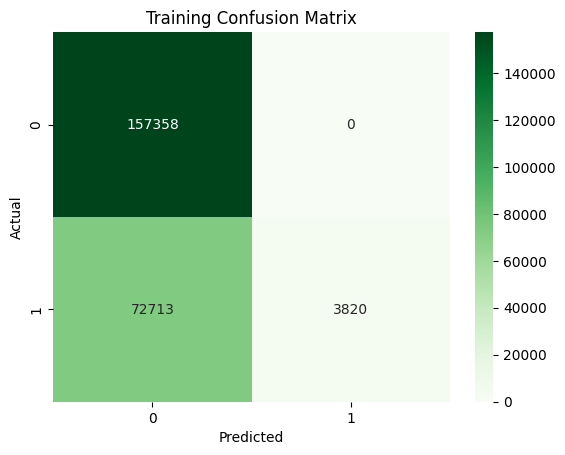

Training ROC-AUC Score: 0.9006


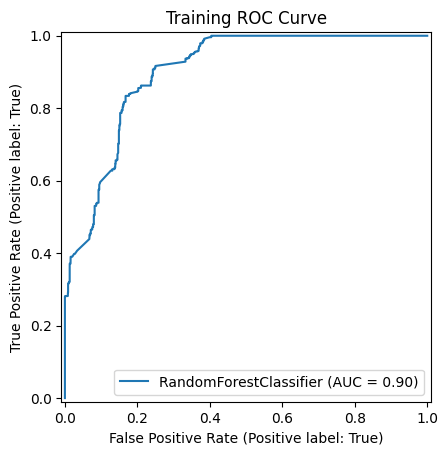

In [21]:
# Assuming 'model' is already trained, and you have X_train, y_train

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on training data
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]

# Accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Classification report
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC on training data
train_roc_auc = roc_auc_score(y_train, y_train_proba)
print(f"Training ROC-AUC Score: {train_roc_auc:.4f}")

# ROC curve
RocCurveDisplay.from_estimator(model, X_train, y_train)
plt.title("Training ROC Curve")
plt.show()


In [23]:
import pandas as pd

# Load new data (replace 'new_data.csv' with your file)
new_data = pd.read_csv('Mental Health Dataset.csv')

# Preprocess new_data the same way as your training data
# Example: If you did one-hot encoding and dropped first category
new_data_processed = pd.get_dummies(new_data, drop_first=True)

# Make sure new_data_processed has the same columns as X_train used for training
# If some columns are missing in new_data_processed, add them with zeros
for col in X_train.columns:
    if col not in new_data_processed.columns:
        new_data_processed[col] = 0

# Reorder columns to match training data
new_data_processed = new_data_processed[X_train.columns]

# Predict using the trained model
predictions = model.predict(new_data_processed)
probabilities = model.predict_proba(new_data_processed)[:, 1]  # Probability of positive class

# Output results
output = new_data.copy()
output['Predicted_Label'] = predictions
output['Predicted_Probability'] = probabilities

print(output.head())  # Show first few predictions


         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium               No            No   


In [16]:
import joblib
joblib.dump(model, 'mental_health_model.pkl')


['mental_health_model.pkl']

In [26]:
import pandas as pd

# Define the columns of your dataset (excluding target)
columns = [
    'Timestamp', 'Gender', 'Country', 'Work Environment', 'Family History',
    'Benefits', 'Care Options', 'Leave', 'Mental Health Consequence',
    'Phys Health Consequence', 'Coworkers', 'Supervisor', 'Mental Health Interview',
    'Phys Health Interview', 'Mental Vs Physical', 'Obs Consequence', 'Comment'
]

# Single new entry as a list (your example)
new_entry = [
    '8/27/2014 12:53', 'Female', 'United States', 'Corporate', 'No', 'Yes',
    'Yes', '1-14 days', 'Yes', 'No', 'Yes', 'Medium', 'No', 'No', 'Yes', 'No', 'Not sure'
]

# Create DataFrame with a single row
new_df = pd.DataFrame([new_entry], columns=columns)

# --- Preprocessing ---

# 1. Drop Timestamp & Comment (usually non-predictive)
new_df = new_df.drop(['Timestamp', 'Comment'], axis=1)

# 2. Convert categorical variables (example: One-Hot Encoding)
# Note: Your training data used pd.get_dummies(drop_first=True), so do the same

new_df_processed = pd.get_dummies(new_df, drop_first=True)

# 3. Add missing columns that your model expects but are not in this new entry
for col in X_train.columns:
    if col not in new_df_processed.columns:
        new_df_processed[col] = 0

# 4. Reorder columns to match training data
new_df_processed = new_df_processed[X_train.columns]

# 5. Predict with your trained model
prediction = model.predict(new_df_processed)[0]
probability = model.predict_proba(new_df_processed)[0,1]

print(f"Prediction: {'Needs Treatment' if prediction == 1 else 'No Treatment Needed'}")
print(f"Probability of needing treatment: {probability:.4f}")


/tmp/ipython-input-2941711093.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_processed[col] = 0
/tmp/ipython-input-2941711093.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_processed[col] = 0
/tmp/ipython-input-2941711093.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

Prediction: No Treatment Needed
Probability of needing treatment: 0.2912


In [28]:
import pandas as pd

# Step 1: Define the columns based on your dataset (excluding 'treatment' column if it's your label)
columns = [
    'Timestamp', 'Gender', 'Country', 'Work Environment', 'Family History',
    'Benefits', 'Care Options', 'Leave', 'Mental Health Consequence',
    'Phys Health Consequence', 'Coworkers', 'Supervisor',
    'Mental Health Interview', 'Phys Health Interview',
    'Mental Vs Physical', 'Obs Consequence', 'Comments'
]

# Step 2: Input the row data
new_entry = [
    '8/27/2014 15:22', 'Female', 'United States', 'Corporate', 'No', 'Yes',
    'Yes', '1-14 days', 'Yes', 'No', 'Yes', 'Medium', 'No', 'No', 'Yes', 'No', 'No'
]

# Step 3: Create a single-row DataFrame
new_df = pd.DataFrame([new_entry], columns=columns)

# Step 4: Drop unused columns (you likely didn't use 'Timestamp' or 'Comments' in training)
new_df = new_df.drop(['Timestamp', 'Comments'], axis=1)

# Step 5: One-hot encode (must match your training logic)
new_df_encoded = pd.get_dummies(new_df, drop_first=True)

# Step 6: Add missing columns from training
for col in X_train.columns:
    if col not in new_df_encoded.columns:
        new_df_encoded[col] = 0

# Step 7: Reorder columns to match training data
new_df_encoded = new_df_encoded[X_train.columns]

# Step 8: Make prediction
prediction = model.predict(new_df_encoded)[0]
probability = model.predict_proba(new_df_encoded)[0][1]

# Step 9: Print the result
result = 'Needs Mental Health Treatment' if prediction == 1 else 'Does NOT Need Mental Health Treatment'
print(f"🧠 Prediction: {result}")
print(f"📊 Probability of needing treatment: {probability:.4f}")


🧠 Prediction: Does NOT Need Mental Health Treatment
📊 Probability of needing treatment: 0.2912


/tmp/ipython-input-531826004.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_encoded[col] = 0
/tmp/ipython-input-531826004.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_encoded[col] = 0
/tmp/ipython-input-531826004.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_